In [1]:
import pandas as pd
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt


In [2]:
# Select three datasets, large, medium, and small, as required
df_large = pd.read_csv('USERS.csv')
df_medium = pd.read_csv('WIKIPROJECTS.csv')
df_small = pd.read_csv('REQUESTS_FOR_COMMENT.csv')

Verify the size and accessibility of data

In [3]:
# data check
print(df_large.head())
print(df_medium.head())
print(df_small.head())



  thread_subject        username                          page_name
0     No subject  Liuxinyu970226  Usertalk000accountdeleted000.json
1     No subject      M2k~dewiki          Usertalk000selina000.json
2     No subject        Peaceray                Usertalk001Jrm.json
3     No subject  Liuxinyu970226             Usertalk007hemant.json
4     No subject          ToJack           Usertalk011ZezoTito.json
                                      thread_subject      username  \
0               Connect families with their members       Jneubert   
1   Integration of {{Q|36948990}}'s country/subje...      Jneubert   
2   Integration of {{Q|36948990}}'s country/subje...         Jura1   
3         English Wikipedia's WikiProject Newspapers  Bluerasberry   
4   Persons archive completed: data donation of Z...      Jneubert   

                                           page_name  
0  WikidatatalkWikiProject20thCenturyPressArchive...  
1  WikidatatalkWikiProject20thCenturyPressArchive...  
2  Wik

In [4]:
# data check
print('Large Dataset:')
print('data size:', df_large.size)
print('data shape:', df_large.shape)  # returns (rows, columns)
print('Medium Dataset:')
print('data size:', df_medium.size)
print('data shape:', df_medium.shape)  # returns (rows, columns)
print('Small Dataset:')
print('data size:', df_small.size)
print('data shape:', df_small.shape)  # returns (rows, columns)



Large Dataset:
data size: 515076
data shape: (171692, 3)
Medium Dataset:
data size: 35583
data shape: (11861, 3)
Small Dataset:
data size: 8775
data shape: (2925, 3)


In [6]:
def build_editor_network(df):
    G = nx.Graph()
    user_ids = {}  # 存储用户对应节点编号
    next_id = 0

    # 遍历每一个话题(thread)，并建立用户之间的连接
    grouped = df.groupby(['page_name', 'thread_subject'])
    
    for (page, thread), group in grouped:
        users = group['username'].unique()
        
        # 为每个用户分配ID
        for user in users:
            if user not in user_ids:
                user_ids[user] = next_id
                next_id += 1
                
        # 为在同一页面同一线程下评论的用户建立边
        for user_pair in combinations(users, 2):
            u1, u2 = user_ids[user_pair[0]], user_ids[user_pair[1]]
            if G.has_edge(u1, u2):
                G[u1][u2]['weight'] += 1
            else:
                G.add_edge(u1, u2, weight=1)
    
    return G, user_ids


In [7]:
G_large, user_ids_large = build_editor_network(df_small)

# 显示网络基本信息
print("Network info：")
print(f"节点数: {G_large.number_of_nodes()}")
print(f"边数: {G_large.number_of_edges()}")
print(f"网络密度: {nx.density(G_large):.6f}")



Network info：
节点数: 837
边数: 27569
网络密度: 0.078799


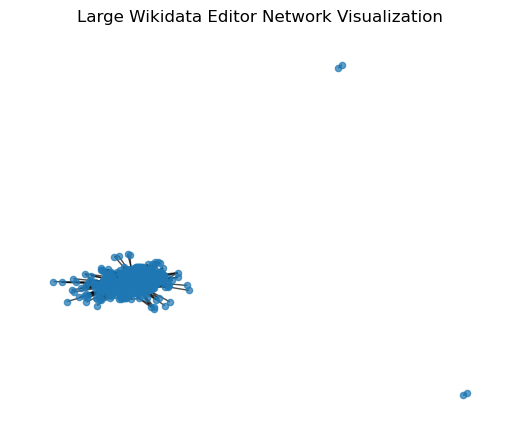

In [8]:
plt.figure(figsize=(5, 4))
nx.draw(G_large, node_size=20, alpha=0.7)
plt.title('Large Wikidata Editor Network Visualization')
plt.show()

